In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [2]:
usc = pd.read_csv('US covid.csv')

In [3]:
usc

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,0.000000,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [4]:
usc.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,58.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.381382,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.195667,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,2.952622,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.382399,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.450908,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [5]:
usc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        58 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [6]:
usc.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [7]:
usc.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           0
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [8]:
usc.drop(['Last_Update','Country_Region','UID'],axis=1,inplace=True)

In [9]:
usc

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,USA,5063.940017,NaN
2,American Samoa,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,0.000000,ASM,222.857246,NaN
3,Arizona,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584
5,California,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,USA,3492.893832,NaN
6,Colorado,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,USA,2289.339188,17.348774
7,Connecticut,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,USA,5349.302875,28.054438
8,Delaware,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,USA,4663.552976,NaN
9,Diamond Princess,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,USA,NaN,NaN


In [10]:
usc['Recovered']=usc["Confirmed"]-usc['Deaths']-usc['Active']

In [11]:
usc # removed Null values of recovered using above formula

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,USA,5063.940017,NaN
2,American Samoa,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,0.000000,ASM,222.857246,NaN
3,Arizona,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584
5,California,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,NaN,4.066421,USA,3492.893832,NaN
6,Colorado,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,USA,2289.339188,17.348774
7,Connecticut,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,USA,5349.302875,28.054438
8,Delaware,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,USA,4663.552976,NaN
9,Diamond Princess,NaN,NaN,49,0,0.0,49.0,88888,NaN,NaN,NaN,0.000000,USA,NaN,NaN


In [12]:
usc.isnull().sum()

Province_State           0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

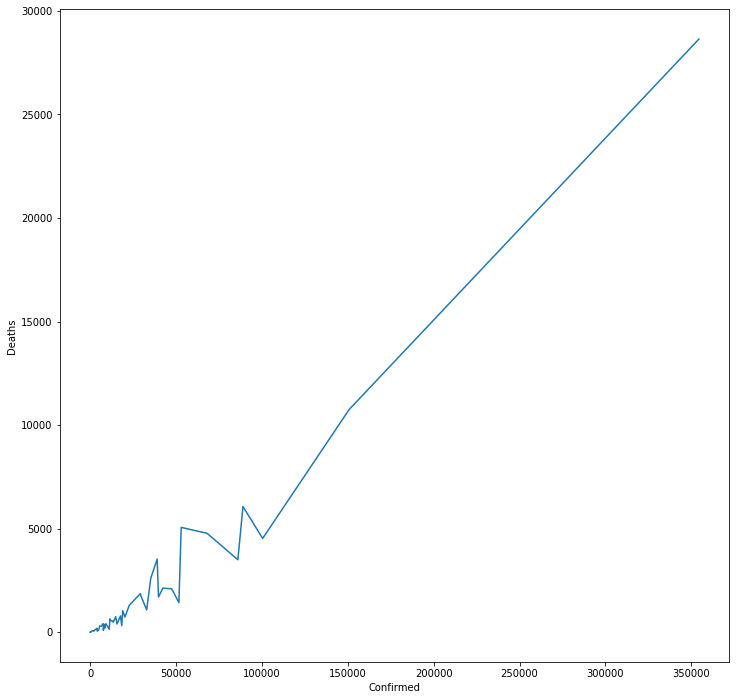

In [13]:
plt.figure(figsize=(12,12))
sns.lineplot(x='Confirmed',y="Deaths",data=usc)
plt.show()

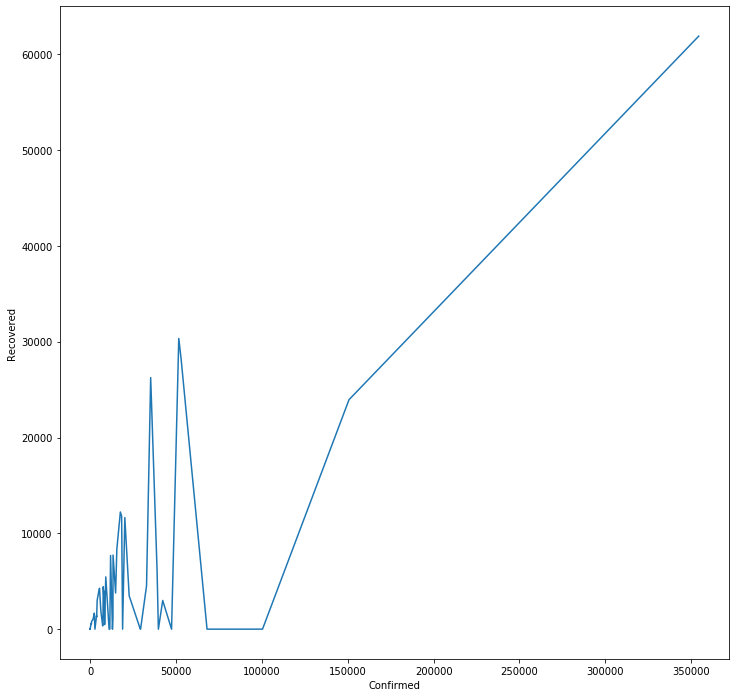

In [14]:
plt.figure(figsize=(12,12))
sns.lineplot(x='Confirmed',y="Recovered",data=usc)
plt.show()

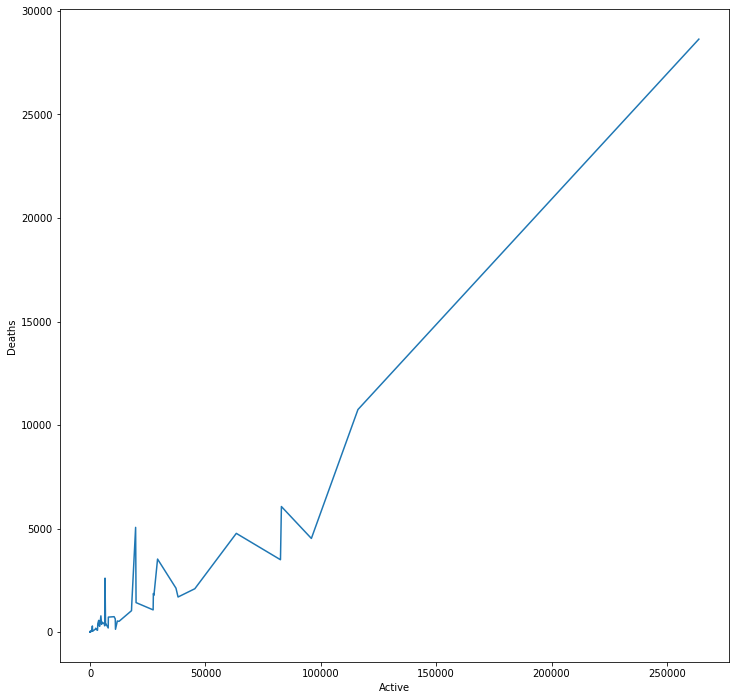

In [15]:
plt.figure(figsize=(12,12))
sns.lineplot(x='Active',y="Deaths",data=usc)
plt.show()

In [16]:
usc.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,USA,5063.940017,NaN
2,American Samoa,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,0.000000,ASM,222.857246,NaN
3,Arizona,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584


In [17]:
usc['Incident_Rate'] = usc['Confirmed']/100

In [18]:
usc.isnull().sum()

Province_State           0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
FIPS                     0
Incident_Rate            0
People_Tested            2
People_Hospitalized     25
Mortality_Rate           0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [19]:
usc['Hospitalization_Rate'] = usc['People_Hospitalized']*100/usc['Confirmed']

In [20]:
usc.isnull().sum()

Province_State           0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
FIPS                     0
Incident_Rate            0
People_Tested            2
People_Hospitalized     25
Mortality_Rate           0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [21]:
usc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Lat                   56 non-null     float64
 2   Long_                 56 non-null     float64
 3   Confirmed             58 non-null     int64  
 4   Deaths                58 non-null     int64  
 5   Recovered             58 non-null     float64
 6   Active                58 non-null     float64
 7   FIPS                  58 non-null     int64  
 8   Incident_Rate         58 non-null     float64
 9   People_Tested         56 non-null     float64
 10  People_Hospitalized   33 non-null     float64
 11  Mortality_Rate        58 non-null     float64
 12  ISO3                  58 non-null     object 
 13  Testing_Rate          56 non-null     float64
 14  Hospitalization_Rate  33 non-null     float64
dtypes: float64(10), int64(3),

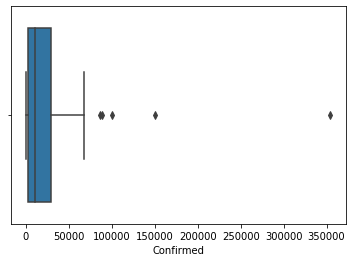

In [22]:
sns.boxplot(usc['Confirmed'])

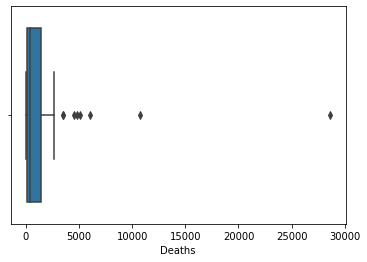

In [23]:
sns.boxplot(usc['Deaths'])

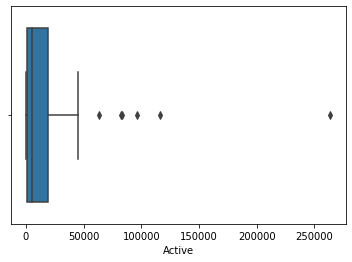

In [24]:
sns.boxplot(usc['Active'])

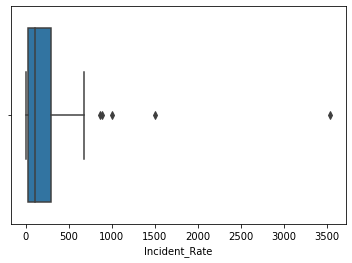

In [25]:
sns.boxplot(usc['Incident_Rate'])

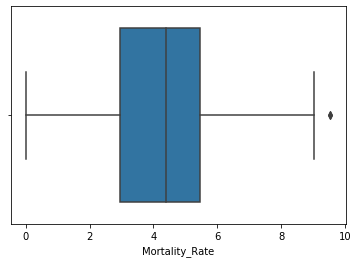

In [26]:
sns.boxplot(usc['Mortality_Rate'])

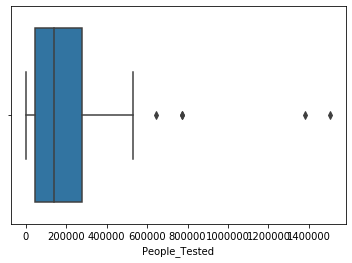

In [27]:
sns.boxplot(usc['People_Tested'])

In [28]:
usc.dtypes

Province_State           object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [29]:
dropcol=['Province_State','Lat','Long_','FIPS','ISO3']

In [30]:
Covid_usa = usc.drop(dropcol,axis=1)

In [31]:
Covid_usa.dropna(inplace=True)

In [32]:
# we need to predict only one variable either the "Hospitalization Rate" or 'People_Hospitalized' as we can find the other using the formula given

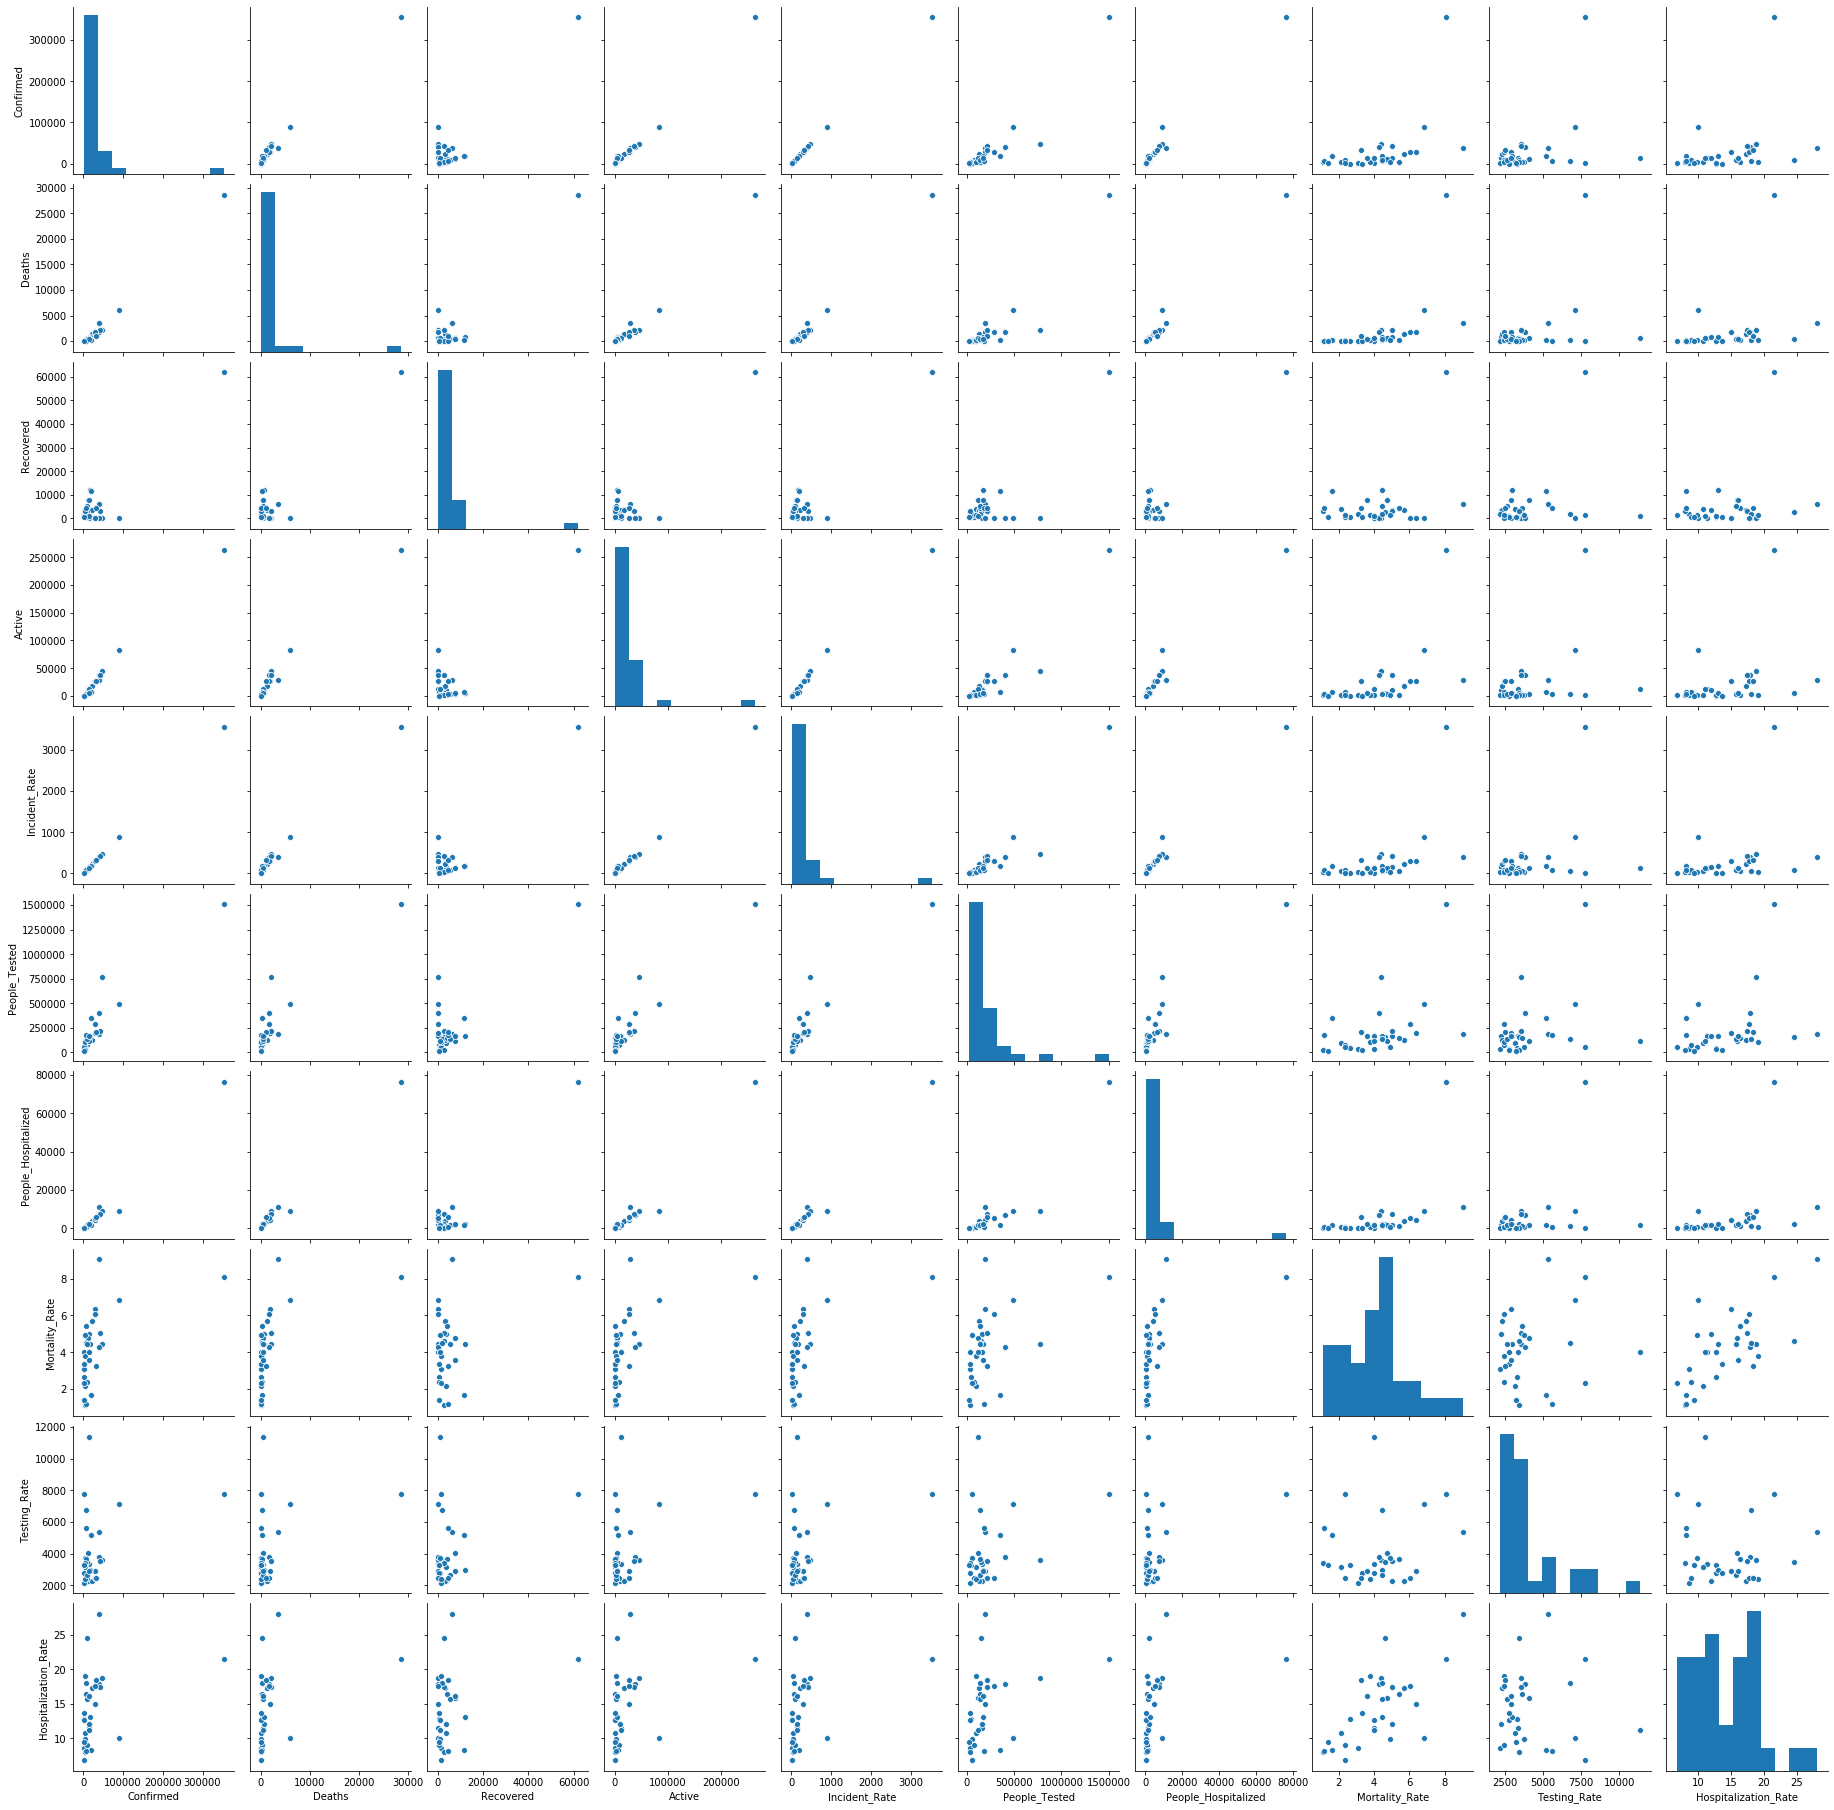

In [33]:
sns.pairplot(Covid_usa)

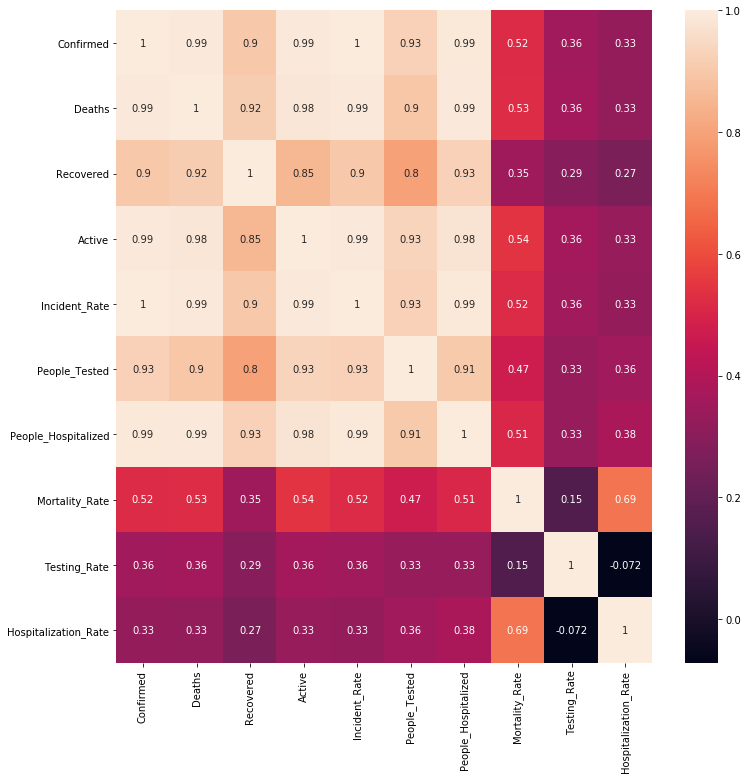

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(Covid_usa.corr(),annot = True)
plt.show()

In [35]:
# above graph shows max correlation between many variables but we cannot drop many of them 

In [36]:
x= Covid_usa.drop(['People_Hospitalized','Hospitalization_Rate'],axis=1)
y=Covid_usa['People_Hospitalized']
df_x= Covid_usa.drop(['People_Hospitalized','Hospitalization_Rate'],axis=1)

In [37]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate
0,0.0,0.196899,-1.709553,0.432423,0.179249,0.0,-0.006907,0.0
1,0.0,0.402965,0.470677,0.327234,0.275043,0.0,0.526117,0.0
2,0.0,-0.720173,0.482425,-0.815819,-0.508405,0.0,-1.150553,0.0
3,0.0,0.719856,0.425027,0.641635,0.581994,0.0,0.862896,0.0
4,0.0,1.288256,0.773705,0.931764,0.971053,0.0,2.302416,0.0
5,0.0,0.992615,-1.709553,1.207908,1.113204,0.0,0.218066,0.0
6,0.0,0.872374,-1.709553,1.096877,0.985469,0.0,0.137081,0.0
7,0.0,-1.779124,-0.401869,-1.991136,-1.907696,0.0,-0.812900,0.0
8,0.0,-0.911127,0.047341,-0.953959,-0.996457,0.0,-0.544023,0.0
9,0.0,0.925849,-1.709553,0.892521,0.762955,0.0,1.175123,0.0


In [38]:
x.isnull().sum()

Confirmed         0
Deaths            0
Recovered         0
Active            0
Incident_Rate     0
People_Tested     0
Mortality_Rate    0
Testing_Rate      0
dtype: int64

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
ls = Lasso()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clf= GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 897859159.5396339, tolerance: 551757.8431448276
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 515585865.52622885, tolerance: 548066.7069172414
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 982939767.417958, tolerance: 551075.9704206896
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 856165297.7537313, tolerance: 552089.0557866667
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21241885.341831226, tolerance: 28168.644146666666
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 938538732.7719585, tolerance: 552252.2298966666
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

{'alpha': 0.1}

In [40]:
rg = Ridge()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clfr= GridSearchCV(rg,parameters,cv=10)
clfr.fit(x,y)
clfr.best_params_

{'alpha': 0.1}

In [41]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,20)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 1}

In [42]:
lr = LinearRegression()
ls=Lasso(alpha=0.1)
rg = Ridge(alpha=0.1)

knr= KNeighborsRegressor(n_neighbors=4)

In [43]:
def maxr2_score(regr,x,y):
    max_r_score = 0 
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_score)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [44]:
r_state= maxr2_score(lr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  43 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  44 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  45 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  46 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  47 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  48 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  49 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  50 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  51 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  52 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  53 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  54 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to

In [45]:
r_state= maxr2_score(knr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  43 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  44 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  45 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  46 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  47 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  48 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  49 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  50 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  51 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  52 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  53 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  54 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to

In [46]:
print('Mean R2 Score for KNeighborsRegressor :',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print("Standard Deviation for KNeighborsRegressor :",cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean R2 Score for KNeighborsRegressor : 0.4463700070447015
Standard Deviation for KNeighborsRegressor : 0.2743568528742881


In [47]:
print('Mean R2 Score for Linear Regressor :',cross_val_score(lr,x,y,cv=5,scoring='r2').mean())
print("Standard Deviation for Linear Regressor :",cross_val_score(lr,x,y,cv=5,scoring='r2').std())

Mean R2 Score for Linear Regressor : -40.66891126459927
Standard Deviation for Linear Regressor : 63.966498873633476


In [48]:
r_state= maxr2_score(ls,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  43 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  44 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  45 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  46 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  47 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  48 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  49 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  50 is <function r2_score at 0x000002C7D564BA68>


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553814475.0963918, tolerance: 534607.1372954545
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8022825.160757257, tolerance: 21143.40078181818
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 922481129.5017486, tolerance: 539252.9432590909
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

r2 score corresponding to  51 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  52 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  53 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  54 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  55 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  56 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  57 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  58 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  59 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  60 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  61 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  62 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  63 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7007618.993940532, tolerance: 22598.276436363638
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8495794.86421011, tolerance: 19917.32529545455
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 660247518.9443475, tolerance: 537892.5225454546
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

r2 score corresponding to  72 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  73 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  74 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  75 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  76 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  77 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  78 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  79 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  80 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  81 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  82 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  83 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  84 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 770508205.7700435, tolerance: 539177.2495454546
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13761138.09740448, tolerance: 22578.78755
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21855068.774770483, tolerance: 23426.30154545455
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

In [49]:
print('Mean R2 Score for LassoRegression :',cross_val_score(ls,x,y,cv=5,scoring='r2').mean())
print("Standard Deviation for LassoRegressor :",cross_val_score(ls,x,y,cv=5,scoring='r2').std())

Mean R2 Score for LassoRegression : -31.20187753950509
Standard Deviation for LassoRegressor : 45.69182032751809


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297777794.866163, tolerance: 546462.233
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 818959595.0451634, tolerance: 545053.1604
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14299764.984783024, tolerance: 23578.47029615385
  positive)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95120

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250]}
clft = GridSearchCV(gbr,parameters,cv=5)
clft.fit(x,y)
clft.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [61]:
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
print('Mean R2 Score for GradientBoostingRegressor :',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print("Standard Deviation for GradientBoostingRegressor :",cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean R2 Score for GradientBoostingRegressor : 0.49165434656029366
Standard Deviation for GradientBoostingRegressor : 0.3258802526931974


In [52]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada = AdaBoostRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250],"base_estimator":[lr,ls,DecisionTreeRegressor()]}
fd = GridSearchCV(ada,parameters,cv=5)
fd.fit(x,y)
fd.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 150}

In [62]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=150)

In [63]:
print('Mean R2 Score for AdaBoostingRegressor :',cross_val_score(ada,x,y,cv=5,scoring='r2').mean())
print("Standard Deviation for AdaBoostingRegressor :",cross_val_score(ada,x,y,cv=5,scoring='r2').std())

Mean R2 Score for AdaBoostingRegressor : 0.7378597179785313
Standard Deviation for AdaBoostingRegressor : 0.31882398187340705


In [64]:
r_state= maxr2_score(ada,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  43 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  44 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  45 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  46 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  47 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  48 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  49 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  50 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  51 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  52 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  53 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  54 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to

In [65]:
r_state= maxr2_score(gbr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  43 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  44 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  45 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  46 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  47 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  48 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  49 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  50 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  51 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  52 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  53 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to  54 is <function r2_score at 0x000002C7D564BA68>
r2 score corresponding to

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=49 ,test_size=0.33)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [58]:
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score:",r2_score(y_test,y_pred))

RMSE is: 20056.3428538156
r2 score: 0.11927787154941083


In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=62 ,test_size=0.33)
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=150)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [69]:
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score:",r2_score(y_test,y_pred)*100)

RMSE is: 406.95834050808065
r2 score: 98.03680650047426


In [70]:
from sklearn.externals import joblib
joblib.dump(ada,"Covid_usa1.obj")

['Covid_usa1.obj']

In [71]:
model = joblib.load('Covid_usa1.obj')

In [72]:
model.predict(x_test)

array([4389.,  383., 1486.,  383., 8934., 7393.,  631.,  631., 1792.,
       1493., 1792.])